In [1]:
from discopy.matrix import Matrix, set_backend

In [2]:
set_backend("numpy")

In [3]:
m = Matrix([0, 1, 1, 0], 2, 2)
v = Matrix([0, 1], 1, 2)
v >> m >> v.dagger()

Matrix[int64]([0], dom=1, cod=1)

In [4]:
Matrix([0], dom=1, cod=1)

Matrix[int64]([0], dom=1, cod=1)

In [5]:
m + m

Matrix[int64]([0, 2, 2, 0], dom=2, cod=2)

In [6]:
assert m.then(m, m, m, m) == m >> m >> m >> m >> m

In [7]:
x = (m @ m).ones(5)

x.array

array([], shape=(0, 5), dtype=int64)

In [8]:
# [2] -> [0]
Matrix.discard(2)

Matrix[float64]([], dom=2, cod=0)

In [9]:
Matrix.copy(2, 3).array

array([[ True, False, False, False, False, False],
       [False, False, False, False, False,  True]])

In [11]:
Matrix.ones(5).array

array([], shape=(0, 5), dtype=float64)

In [29]:
Matrix.merge(1, 5)

Matrix[bool_]([True, True, True, True, True], dom=5, cod=1)

In [12]:
from discopy.braided import *

Unit = Ty()
Q = Ty("Q")
S = Ty("S")
U = Ty("U")
H = Ty("H")

vq1, vq2, vq3, vq4 = [
    Box(i, Unit, Q) for i in ["$v^q_1$", "$v^q_2$", "$v^q_3$", "$v^q_4$"]
]
vs1, vs2 = [Box(i, Unit, S) for i in ["$v^s_1$", "$v^s_2$"]]
vu1, vu2, u_i_hat = [Box(i, Unit, U) for i in ["$v^u_1$", "$v^u_2$", "$\\hat{u}_i$"]]

q, k = [Box(i, Unit, H) for i in ["$q$", "$k$"]]

zero = lambda t: Merge(t, 0)

l1, l2, l3, l4, l5, l6 = [
    Box(i, Unit, Unit)
    for i in [
        "$c_1 + ic_2$",
        "$c_3$",
        "$\\langle v_1^q + v_2^q | v_3^q\\rangle^{-1}$",
        "$\\langle v_1^s | v_2^s\\rangle^{-1}$",
        "$\\langle v_1^q + v_2^q | v_4^q\\rangle^{-1}c_4",
        "$c_5$",
    ]
]

In [30]:
embed = vq1 @ (vs1 >> l1) @ (u_i_hat >> l2) @ zero(U)
pos = vq2 @ zero(S) @ zero(U) @ zero(U)

W_Q = ((vq3 @ zero(S) @ zero(U) @ vu1)[::-1]) >> (q >> l3)

W_K = ((zero(Q) @ vs2 @ zero(U) @ vu2)[::-1]) >> (k >> l4)

W_V = (zero(Q) @ zero(S) @ Id(U) @ zero(U))[::-1]
W_O = zero(Q) @ zero(S) @ zero(U) @ Id(U)

u_i = vq4 @ zero(S) @ zero(U) @ (u_i_hat >> l6)

AxiomError: $v^s_1$ does not compose with $c_1 + ic_2$: S != Ty().

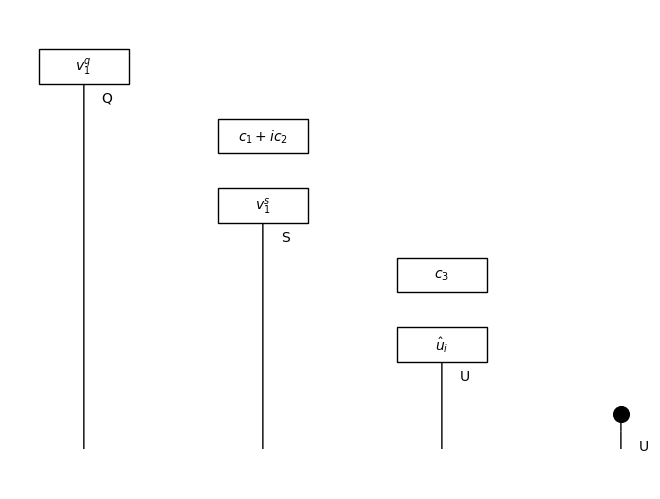

In [14]:
embed.draw()

In [15]:
import numpy as np

In [16]:
from discopy.tensor import Dim, Tensor

In [25]:
# model dim 32
F = Functor(
    {
        Unit: 1,
        Q: 6,
        S: 6,
        U: 5,
        H: 32,
    },
    {vq2: Matrix(np.random.rand(6), dom=1, cod=6)},
    cod=Category(Dim, Tensor),
)

Tensor[float64]([0.68953961, 0.68953961, 0.68953961, ..., 0.45986704, 0.45986704,
 0.45986704], dom=Dim(1), cod=Dim(6, 6, 5, 5))